<a href="https://colab.research.google.com/github/Abhishek3102/IBM-SKILLBUILDS-HACK/blob/main/model_building_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/chronic_disease_prediction_dataset.csv", index_col=False)
df.head()

,Age,Gender,Race,Family_History_Diabetes,Family_History_Cancer,Family_History_Heart,Previous_Conditions,Medication_Count,BMI,Blood_Pressure_Sys,...,Has_Diabetes,Has_Heart_Disease,Has_Cancer,Frequent_Urination,Chest_Pain,Unexplained_Weight_Loss,Fatigue,Vision_Problems,Shortness_of_Breath,Persistent_Cough
0,69,Female,White,0,0,0,Thyroid,0,34.3,138,...,1,1,0,0,0,0,0,0,0,0
1,32,Female,Black,0,0,1,Asthma,1,29.7,111,...,1,1,1,0,0,0,1,0,0,1
2,89,Female,Asian,0,0,0,Asthma,2,28.3,158,...,1,1,0,0,0,1,1,0,0,0
3,78,Male,Black,0,0,0,Asthma,1,25.5,153,...,0,1,0,0,0,0,1,0,0,0
4,38,Female,Other,0,0,1,NaN,2,26.5,125,...,1,1,0,0,0,0,1,1,0,0


In [3]:
df.columns.value_counts().sum()

np.int64(35)

In [4]:
df['Family_History_Cancer'].value_counts()

,count
Family_History_Cancer,
0,1482
1,518


In [5]:
df.columns

Index(['Age', 'Gender', 'Race', 'Family_History_Diabetes',
       'Family_History_Cancer', 'Family_History_Heart', 'Previous_Conditions',
       'Medication_Count', 'BMI', 'Blood_Pressure_Sys', 'Blood_Pressure_Dia',
       'Glucose_Level', 'HbA1c', 'Cholesterol_Total', 'HDL', 'LDL',
       'Triglycerides', 'Resting_Heart_Rate', 'White_Blood_Cell_Count',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'Diet_Quality',
       'Sleep_Hours', 'Stress_Level', 'Has_Diabetes', 'Has_Heart_Disease',
       'Has_Cancer', 'Frequent_Urination', 'Chest_Pain',
       'Unexplained_Weight_Loss', 'Fatigue', 'Vision_Problems',
       'Shortness_of_Breath', 'Persistent_Cough'],
      dtype='object')

In [6]:
!pip install xgboost joblib

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

In [8]:
categorical_cols = ['Gender', 'Smoking_Status', 'Alcohol_Intake', 'Diet_Quality', 'Physical_Activity', 'Race', 'Previous_Conditions', 'Stress_Level']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
df['Mean_BP'] = (df['Blood_Pressure_Sys'] + df['Blood_Pressure_Dia']) / 2
df['Lifestyle_Score'] = df[['Diet_Quality', 'Physical_Activity']].mean(axis=1)

In [10]:
# Drop redundant columns
df.drop(['Blood_Pressure_Sys', 'Blood_Pressure_Dia', 'Diet_Quality', 'Physical_Activity'], axis=1, inplace=True)

In [11]:
X = df.drop(['Has_Diabetes', 'Has_Heart_Disease', 'Has_Cancer'], axis=1)
y = df[['Has_Diabetes', 'Has_Heart_Disease', 'Has_Cancer']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
multi_model = MultiOutputClassifier(xgb)
multi_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=True,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))

In [14]:
y_pred = multi_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       0.95      0.93      0.94       278
           2       1.00      1.00      1.00       121

   micro avg       0.98      0.97      0.97       642
   macro avg       0.98      0.98      0.98       642
weighted avg       0.98      0.97      0.97       642
 samples avg       0.89      0.88      0.88       642



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss

In [20]:
models = {
    'XGBoost': MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    'Logistic Regression': MultiOutputClassifier(LogisticRegression(max_iter=1000))
}

In [21]:
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ham = hamming_loss(y_test, y_pred)
    model_scores[name] = {'accuracy': acc, 'hamming_loss': ham}

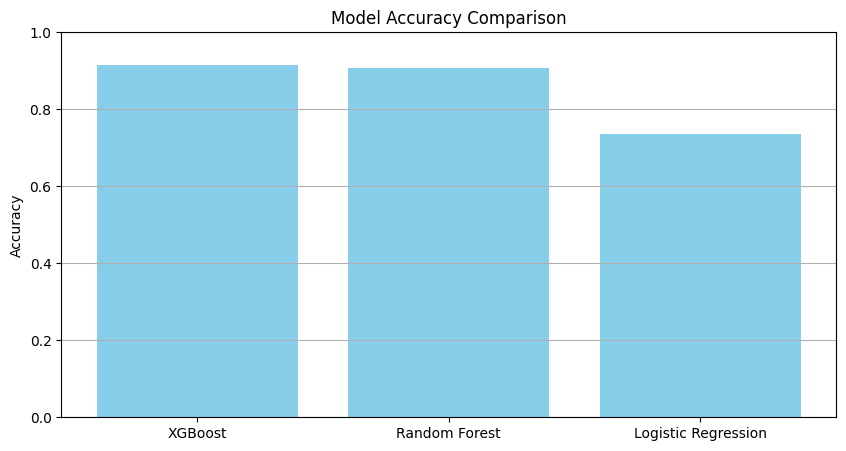

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(model_scores.keys(), [v['accuracy'] for v in model_scores.values()], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

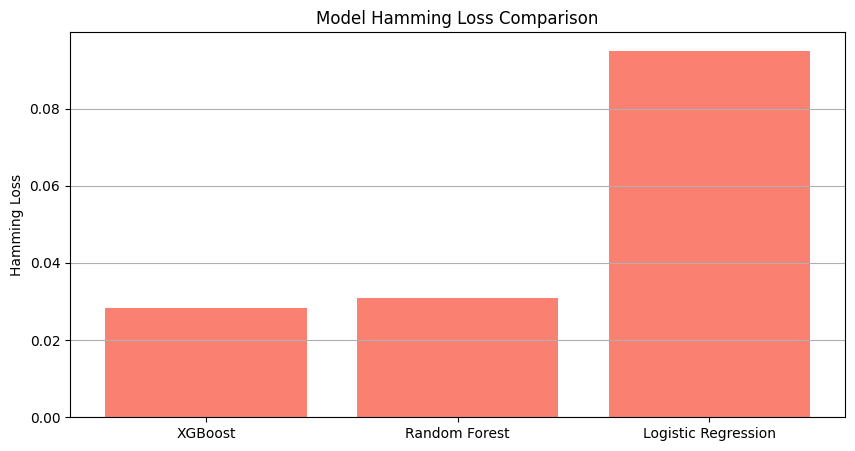

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(model_scores.keys(), [v['hamming_loss'] for v in model_scores.values()], color='salmon')
plt.title("Model Hamming Loss Comparison")
plt.ylabel("Hamming Loss")
plt.grid(axis='y')
plt.show()

In [24]:
print(model_scores)

{'XGBoost': {'accuracy': 0.915, 'hamming_loss': 0.028333333333333332}, 'Random Forest': {'accuracy': 0.9075, 'hamming_loss': 0.030833333333333334}, 'Logistic Regression': {'accuracy': 0.735, 'hamming_loss': 0.095}}


In [25]:
joblib.dump(multi_model, "chronic_disease_multilabel_model.pkl")

['chronic_disease_multilabel_model.pkl']

In [27]:
model = joblib.load('/content/chronic_disease_multilabel_model.pkl')

In [28]:
print("Please enter the following details:")

age = int(input("1. Age (e.g., 45): "))
gender = int(input("2. Gender (0 = Female, 1 = Male): "))
bmi = float(input("3. BMI (e.g., 27.5): "))
smoking = int(input("4. Smoking Status (0 = No, 1 = Yes): "))
alcohol = int(input("5. Alcohol Intake (0 = No, 1 = Yes): "))
physical_activity = int(input("6. Physical Activity (0 = No, 1 = Yes): "))
blood_pressure = float(input("7. Blood Pressure (e.g., 120): "))
cholesterol = float(input("8. Cholesterol Level (e.g., 200): "))
blood_sugar = float(input("9. Blood Sugar Level (e.g., 95): "))

# Create DataFrame with same structure as training data
input_data = pd.DataFrame([[
    age, gender, bmi, smoking, alcohol,
    physical_activity, blood_pressure, cholesterol, blood_sugar
]], columns=[
    'Age', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Intake',
    'Physical_Activity', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level'
])

prediction = model.predict(input_data)[0]

# Labels for multi-label prediction
diseases = ['Diabetes', 'Heart Disease', 'Cancer']

print("\n🔍 Prediction Results:")
for i, result in enumerate(prediction):
    if result == 1:
        print(f"✅ Likely to have {diseases[i]}")
    else:
        print(f"❌ Not likely to have {diseases[i]}")


Please enter the following details:
1. Age (e.g., 45): 64
2. Gender (0 = Female, 1 = Male): 1
3. BMI (e.g., 27.5): 35.9
4. Smoking Status (0 = No, 1 = Yes): 1
5. Alcohol Intake (0 = No, 1 = Yes): 1
6. Physical Activity (0 = No, 1 = Yes): 0
7. Blood Pressure (e.g., 120): 245
8. Cholesterol Level (e.g., 200): 356
9. Blood Sugar Level (e.g., 95): 452


ValueError: feature_names mismatch: ['Age', 'Gender', 'Race', 'Family_History_Diabetes', 'Family_History_Cancer', 'Family_History_Heart', 'Previous_Conditions', 'Medication_Count', 'BMI', 'Glucose_Level', 'HbA1c', 'Cholesterol_Total', 'HDL', 'LDL', 'Triglycerides', 'Resting_Heart_Rate', 'White_Blood_Cell_Count', 'Smoking_Status', 'Alcohol_Intake', 'Sleep_Hours', 'Stress_Level', 'Frequent_Urination', 'Chest_Pain', 'Unexplained_Weight_Loss', 'Fatigue', 'Vision_Problems', 'Shortness_of_Breath', 'Persistent_Cough', 'Mean_BP', 'Lifestyle_Score'] ['Age', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level']
expected Resting_Heart_Rate, Vision_Problems, Stress_Level, Mean_BP, Family_History_Diabetes, Cholesterol_Total, Triglycerides, Lifestyle_Score, Previous_Conditions, Family_History_Heart, White_Blood_Cell_Count, HbA1c, Frequent_Urination, Medication_Count, LDL, Family_History_Cancer, Shortness_of_Breath, Unexplained_Weight_Loss, Glucose_Level, Sleep_Hours, Fatigue, Persistent_Cough, HDL, Race, Chest_Pain in input data
training data did not have the following fields: Cholesterol_Level, Blood_Sugar_Level, Blood_Pressure, Physical_Activity